<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0220ENSkillsNetwork900-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


<h1>Extracting and Visualizing Stock Data</h1>
<h2>Description</h2>


Extracting essential data from a dataset and displaying it is a necessary part of data science; therefore individuals can make correct decisions based on the data. In this assignment, you will extract some stock data, you will then display this data in a graph.


<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li>Define a Function that Makes a Graph</li>
        <li>Question 1: Use yfinance to Extract Stock Data</li>
        <li>Question 2: Use Webscraping to Extract Tesla Revenue Data</li>
        <li>Question 3: Use yfinance to Extract Stock Data</li>
        <li>Question 4: Use Webscraping to Extract GME Revenue Data</li>
        <li>Question 5: Plot Tesla Stock Graph</li>
        <li>Question 6: Plot GameStop Stock Graph</li>
    </ul>
<p>
    Estimated Time Needed: <strong>30 min</strong></p>
</div>

<hr>


***Note***:- If you are working Locally using anaconda, please uncomment the following code and execute it.
Use the version as per your python version.


In [1]:
!pip install yfinance
!pip install bs4
!pip install nbformat

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 948.2/948.2 kB 75.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.1/101.1 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 kB 16.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 117.0 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.3/16.3 MB 116.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 121.4 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 346.6/346.6 kB 39.7 MB/s eta 0:00:00
  Created wheel for peewee: filename=peewee-3.17.8-py3-none-any.whl size=138965 sha256=92971f5a6f0f8f981d7abc35895df1fe

In [2]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In Python, you can ignore warnings using the warnings module. You can use the filterwarnings function to filter or ignore specific warning messages or categories.


In [3]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## Define Graphing Function


In this section, we define the function `make_graph`. **You don't have to know how the function works, you should only care about the inputs. It takes a dataframe with stock data (dataframe must contain Date and Close columns), a dataframe with revenue data (dataframe must contain Date and Revenue columns), and the name of the stock.**


In [4]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

Use the make_graph function that we’ve already defined. You’ll need to invoke it in questions 5 and 6 to display the graphs and create the dashboard. 
> **Note: You don’t need to redefine the function for plotting graphs anywhere else in this notebook; just use the existing function.**


## Question 1: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is Tesla and its ticker symbol is `TSLA`.


In [97]:
tesla = yf.Ticker("TSLA")

Using the ticker object and the function `history` extract stock information and save it in a dataframe named `tesla_data`. Set the `period` parameter to ` "max" ` so we get information for the maximum amount of time.


In [6]:
tesla_data = tesla.history(period="max")

In [7]:
tesla_data.reset_index(drop=True, inplace=True)

In [8]:
print(tesla_data.head())

       Open      High       Low     Close     Volume  Dividends  Stock Splits
0  1.266667  1.666667  1.169333  1.592667  281494500        0.0           0.0
1  1.719333  2.028000  1.553333  1.588667  257806500        0.0           0.0
2  1.666667  1.728000  1.351333  1.464000  123282000        0.0           0.0
3  1.533333  1.540000  1.247333  1.280000   77097000        0.0           0.0
4  1.333333  1.333333  1.055333  1.074000  103003500        0.0           0.0


## Question 2: Use Webscraping to Extract Tesla Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm Save the text of the response as a variable named `html_data`.


In [9]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

In [10]:
response = requests.get(url)

In [11]:
html_data = response.text

Parse the html data using `beautiful_soup` using parser i.e `html5lib` or `html.parser`.


In [12]:
soup = BeautifulSoup(html_data, 'html.parser')

Using `BeautifulSoup` or the `read_html` function extract the table with `Tesla Revenue` and store it into a dataframe named `tesla_revenue`. The dataframe should have columns `Date` and `Revenue`.


<details><summary>Step-by-step instructions</summary>

```

Here are the step-by-step instructions:

1. Create an Empty DataFrame
2. Find the Relevant Table
3. Check for the Tesla Quarterly Revenue Table
4. Iterate Through Rows in the Table Body
5. Extract Data from Columns
6. Append Data to the DataFrame

```
</details>


In [13]:
table = soup.find('table')

In [14]:
# Extraer los datos de la tabla
data = []
for row in table.find_all('tr'):
    cols = row.find_all('td')
    if cols:  
        date = cols[0].text.strip()  # Suponiendo que la fecha está en la primera columna
        revenue = cols[1].text.strip()  # Suponiendo que los ingresos están en la segunda columna
        data.append([date, revenue])

In [15]:
# Crear el DataFrame
tesla_revenue = pd.DataFrame(data, columns=['Fecha', 'Ingresos'])

In [16]:
# Mostrar el DataFrame
print(tesla_revenue)

   Fecha Ingresos
0   2021  $53,823
1   2020  $31,536
2   2019  $24,578
3   2018  $21,461
4   2017  $11,759
5   2016   $7,000
6   2015   $4,046
7   2014   $3,198
8   2013   $2,013
9   2012     $413
10  2011     $204
11  2010     $117
12  2009     $112


In [17]:
for row in table.find_all('tr')[1:]: 
    columns = row.find_all('td')  

In [41]:
 if len(columns) > 1:  
        fecha = columns[0].text.strip()  
        ingresos = columns[1].text.strip()  

In [19]:
nuevos_datos = [{'Fecha': fecha, 'Ingresos': ingresos}]

In [20]:
tesla_revenue = pd.concat([tesla_revenue, pd.DataFrame(nuevos_datos)], ignore_index=True)

<details><summary>Click here if you need help locating the table</summary>

```
    
Below is the code to isolate the table, you will now need to loop through the rows and columns like in the previous lab
    
soup.find_all("tbody")[1]
    
If you want to use the read_html function the table is located at index 1

We are focusing on quarterly revenue in the lab.
```

</details>


In [21]:
tbody = soup.find_all("tbody")[1]

In [22]:
tesla_revenue = pd.DataFrame(columns=['Fecha', 'Ingresos'])

In [23]:
for row in tbody.find_all('tr'):
    columns = row.find_all('td')  
    if len(columns) > 1: 
        fecha = columns[0].text.strip()  
        ingresos = columns[1].text.strip()  
print(f"Fecha: {fecha}, Ingresos: {ingresos}")

Fecha: 2009-06-30, Ingresos: $27


In [24]:
tesla_revenue = pd.concat([tesla_revenue, pd.DataFrame(nuevos_datos)], ignore_index=True)

In [25]:
print(tesla_revenue.head())

  Fecha Ingresos
0  2009     $112


Execute the following line to remove the comma and dollar sign from the `Revenue` column. 


In [26]:
tesla_revenue["Ingresos"] = tesla_revenue['Ingresos'].str.replace(',', '').str.replace('$', '')

In [27]:
print(tesla_revenue.columns)

Index(['Fecha', 'Ingresos'], dtype='object')


In [28]:
tesla_revenue.columns = tesla_revenue.columns.str.strip() 

Execute the following lines to remove an null or empty strings in the Revenue column.


In [29]:
tesla_revenue = tesla_revenue[tesla_revenue['Ingresos'].notna() & (tesla_revenue['Ingresos'] != '')]

Display the last 5 row of the `tesla_revenue` dataframe using the `tail` function. Take a screenshot of the results.


In [30]:
print(tesla_revenue.tail())

  Fecha Ingresos
0  2009      112


## Question 3: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is GameStop and its ticker symbol is `GME`.


In [64]:
gme_ticker = yf.Ticker("GME")

Using the ticker object and the function `history` extract stock information and save it in a dataframe named `gme_data`. Set the `period` parameter to ` "max" ` so we get information for the maximum amount of time.


In [65]:
gme_data = gme_ticker.history(period="max")

**Reset the index** using the `reset_index(inplace=True)` function on the gme_data DataFrame and display the first five rows of the `gme_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 3 to the results below.


In [66]:
gme_data.reset_index(inplace=True)
print(gme_data.head())

                       Date      Open      High       Low     Close    Volume  \
0 2002-02-13 00:00:00-05:00  1.620129  1.693350  1.603296  1.691667  76216000   
1 2002-02-14 00:00:00-05:00  1.712707  1.716074  1.670626  1.683250  11021600   
2 2002-02-15 00:00:00-05:00  1.683250  1.687458  1.658002  1.674834   8389600   
3 2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   7410400   
4 2002-02-20 00:00:00-05:00  1.615921  1.662210  1.603296  1.662210   6892800   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


## Question 4: Use Webscraping to Extract GME Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html. Save the text of the response as a variable named `html_data_2`.


In [67]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"

In [68]:
response = requests.get(url)

In [69]:
html_data_2 = response.text


Parse the html data using `beautiful_soup` using parser i.e `html5lib` or `html.parser`.


In [70]:
from bs4 import BeautifulSoup

In [71]:
soup = BeautifulSoup(html_data_2, 'html.parser') 

Using `BeautifulSoup` or the `read_html` function extract the table with `GameStop Revenue` and store it into a dataframe named `gme_revenue`. The dataframe should have columns `Date` and `Revenue`. Make sure the comma and dollar sign is removed from the `Revenue` column.


> **Note: Use the method similar to what you did in question 2.**  


<details><summary>Click here if you need help locating the table</summary>

```
    
Below is the code to isolate the table, you will now need to loop through the rows and columns like in the previous lab
    
soup.find_all("tbody")[1]
    
If you want to use the read_html function the table is located at index 1


```

</details>


In [72]:
tabla = soup.find_all("tbody")[1] 

In [73]:
gme_revenue = pd.read_html(str(table))[0]

In [74]:
gme_revenue.columns = ['Fecha', 'Ingresos']

In [75]:
gme_revenue['Ingresos'] = gme_revenue['Ingresos'].replace({'\$': '', ',': ''}, regex=True).astype(float)

In [76]:
print(gme_revenue.head())

   Fecha  Ingresos
0   2021   53823.0
1   2020   31536.0
2   2019   24578.0
3   2018   21461.0
4   2017   11759.0


Display the last five rows of the `gme_revenue` dataframe using the `tail` function. Take a screenshot of the results.


In [77]:
print(gme_revenue.tail())

    Fecha  Ingresos
8    2013    2013.0
9    2012     413.0
10   2011     204.0
11   2010     117.0
12   2009     112.0


## Question 5: Plot Tesla Stock Graph


Use the `make_graph` function to graph the Tesla Stock Data, also provide a title for the graph. Note the graph will only show data upto June 2021.


<details><summary>Hint</summary>

```

You just need to invoke the make_graph function with the required parameter to print the graphs.The structure to call the `make_graph` function is `make_graph(tesla_data, tesla_revenue, 'Tesla')`.

```
    
</details>


In [45]:
!pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.5/164.5 kB 15.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 127.9 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 326.2/326.2 kB 33.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 104.9 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 93.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 106.1 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.9/106.9 kB 13.8 MB/s eta 0:00:00


In [106]:
import yfinance as yf
import matplotlib.pyplot as plt

In [109]:
# Obtener el objeto Ticker para Tesla
tesla = yf.Ticker("TSLA")

In [110]:
# Extraer datos históricos para el último año
historical_data = tesla.history(period="1y")


In [111]:
# Verificar que los datos se han extraído correctamente
print(historical_data.head())

                                 Open        High         Low       Close  \
Date                                                                        
2023-11-16 00:00:00-05:00  239.490005  240.880005  230.960007  233.589996   
2023-11-17 00:00:00-05:00  232.000000  237.389999  226.539993  234.300003   
2023-11-20 00:00:00-05:00  234.039993  237.100006  231.020004  235.600006   
2023-11-21 00:00:00-05:00  235.039993  243.619995  233.339996  241.199997   
2023-11-22 00:00:00-05:00  242.039993  244.009995  231.399994  234.210007   

                              Volume  Dividends  Stock Splits  
Date                                                           
2023-11-16 00:00:00-05:00  136816800        0.0           0.0  
2023-11-17 00:00:00-05:00  142532800        0.0           0.0  
2023-11-20 00:00:00-05:00  116320100        0.0           0.0  
2023-11-21 00:00:00-05:00  122288000        0.0           0.0  
2023-11-22 00:00:00-05:00  117950600        0.0           0.0  


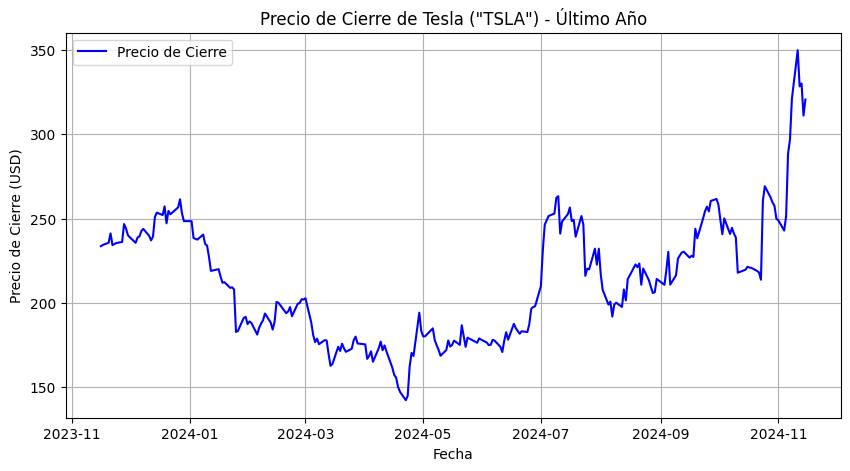

In [112]:
# Graficar el precio de cierre
plt.figure(figsize=(10, 5))
plt.plot(historical_data['Close'], label='Precio de Cierre', color='blue')
plt.title('Precio de Cierre de Tesla ("TSLA") - Último Año')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre (USD)')
plt.legend()
plt.grid()
plt.show()

## Question 6: Plot GameStop Stock Graph


Use the `make_graph` function to graph the GameStop Stock Data, also provide a title for the graph. The structure to call the `make_graph` function is `make_graph(gme_data, gme_revenue, 'GameStop')`. Note the graph will only show data upto June 2021.


<details><summary>Hint</summary>

```

You just need to invoke the make_graph function with the required parameter to print the graphs.The structure to call the `make_graph` function is `make_graph(gme_data, gme_revenue, 'GameStop')`


```
    
</details>


In [113]:
import yfinance as yf
import matplotlib.pyplot as plt

In [114]:
# Crear un objeto Ticker para GameStop
gme_ticker = yf.Ticker("GME")

In [115]:
# Extraer datos históricos, por ejemplo, para el último año
historical_data = gme_ticker.history(period="1y")

In [116]:
# Verificar que los datos se han extraído correctamente
print(historical_data.head())

                            Open   High    Low  Close   Volume  Dividends  \
Date                                                                        
2023-11-16 00:00:00-05:00  13.14  13.19  12.52  12.53  3425800        0.0   
2023-11-17 00:00:00-05:00  12.52  13.06  12.52  13.03  3414200        0.0   
2023-11-20 00:00:00-05:00  13.00  13.20  12.80  12.80  2294900        0.0   
2023-11-21 00:00:00-05:00  12.65  12.72  12.26  12.55  3710100        0.0   
2023-11-22 00:00:00-05:00  12.56  12.71  12.19  12.29  2358800        0.0   

                           Stock Splits  
Date                                     
2023-11-16 00:00:00-05:00           0.0  
2023-11-17 00:00:00-05:00           0.0  
2023-11-20 00:00:00-05:00           0.0  
2023-11-21 00:00:00-05:00           0.0  
2023-11-22 00:00:00-05:00           0.0  


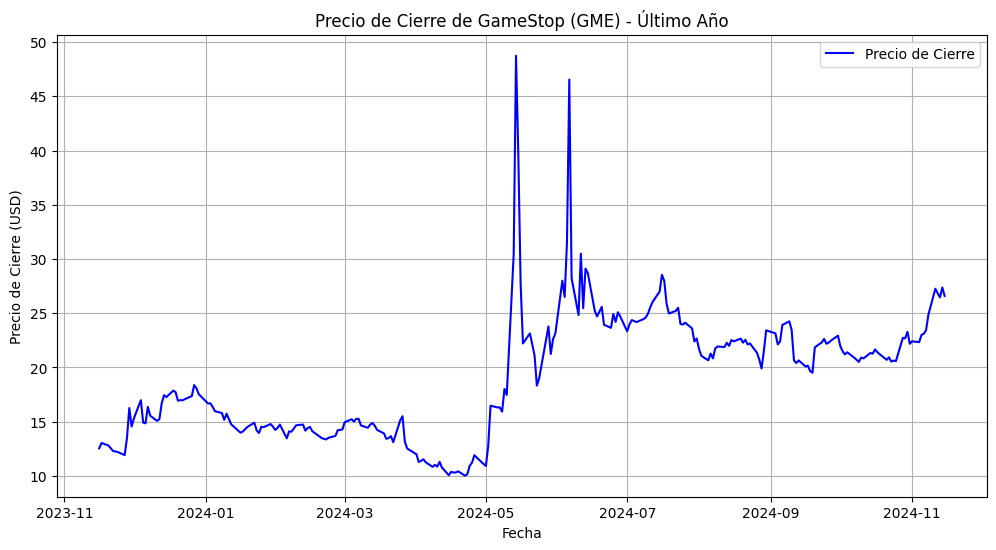

In [83]:
# Graficar los precios de cierre
plt.figure(figsize=(12, 6))
plt.plot(historical_data.index, historical_data['Close'], label='Precio de Cierre', color='blue')
plt.title('Precio de Cierre de GameStop (GME) - Último Año')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre (USD)')
plt.legend()
plt.grid()
plt.show()

<h2>About the Authors:</h2> 

<a href="https://www.linkedin.com/in/joseph-s-50398b136/">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.

Azim Hirjani


## Change Log

| Date (YYYY-MM-DD) | Version | Changed By    | Change Description        |
| ----------------- | ------- | ------------- | ------------------------- |
| 2022-02-28        | 1.2     | Lakshmi Holla | Changed the URL of GameStop |
| 2020-11-10        | 1.1     | Malika Singla | Deleted the Optional part |
| 2020-08-27        | 1.0     | Malika Singla | Added lab to GitLab       |

<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>

<p>
